<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/advance_prog_cls_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Customer_Data.csv')
df.head(10)

Name   Age  Gender  Salary Purchased
0   John  25.0    Male   50000       Yes
1  Sarah  28.0  Female  400000       Yes
2   Mike   NaN    Male   60000       Yes
3   Anna  22.0  Female   58000        No
4    Tom  30.0    Male   54000       NaN

### check missing data

In [ ]:
df.isnull().sum()

Name         0
Age          1
Gender       0
Salary       0
Purchased    1
dtype: int64

In [ ]:
df.describe()

Age         Salary
count   4.00       5.000000
mean   26.25  124400.000000
std     3.50  154112.945595
min    22.00   50000.000000
25%    24.25   54000.000000
50%    26.50   58000.000000
75%    28.50   60000.000000
max    30.00  400000.000000

In [ ]:
skew_age = df['Age'].skew(skipna= True)
skew_age

np.float64(-0.3206997084548105)

|skew_age| < 0.5 -- no significant skewness

0.5 <= |skew_age| < 1 -- moderate skewness

|skew_age| >= 1 -- severe skewness

negative skew - mean < median (left - skewed)

positive skew - mena > median (right - skewed)

In [ ]:
skew_sal = df['Salary'].skew(skipna= True)
skew_sal

np.float64(2.232589887860825)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df

<ipython-input-59-2368695939>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


Name    Age  Gender  Salary Purchased
0   John  25.00    Male   50000       Yes
1  Sarah  28.00  Female  400000       Yes
2   Mike  26.25    Male   60000       Yes
3   Anna  22.00  Female   58000        No
4    Tom  30.00    Male   54000       NaN

In [ ]:
mode_value = df['Purchased'].mode()[0]
df['Purchased'].fillna(mode_value, inplace=True)
df


<ipython-input-60-1115457065>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchased'].fillna(mode_value, inplace=True)


Name    Age  Gender  Salary Purchased
0   John  25.00    Male   50000       Yes
1  Sarah  28.00  Female  400000       Yes
2   Mike  26.25    Male   60000       Yes
3   Anna  22.00  Female   58000        No
4    Tom  30.00    Male   54000       Yes

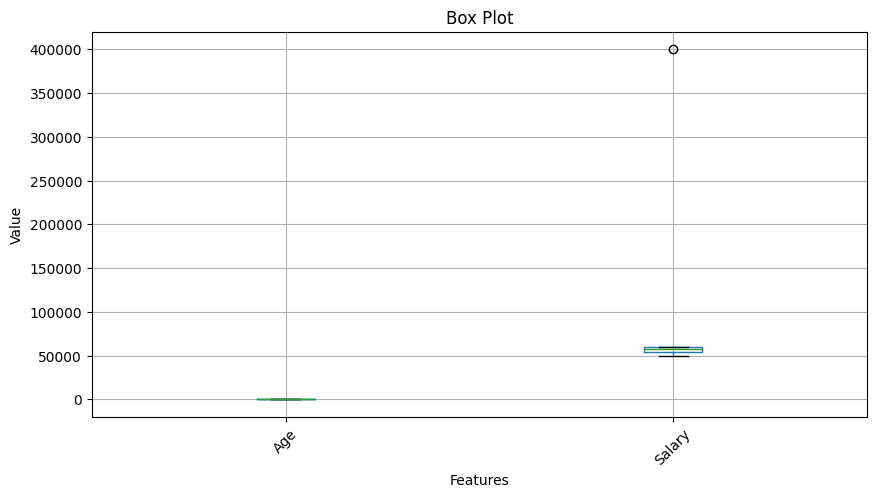

In [ ]:
df.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

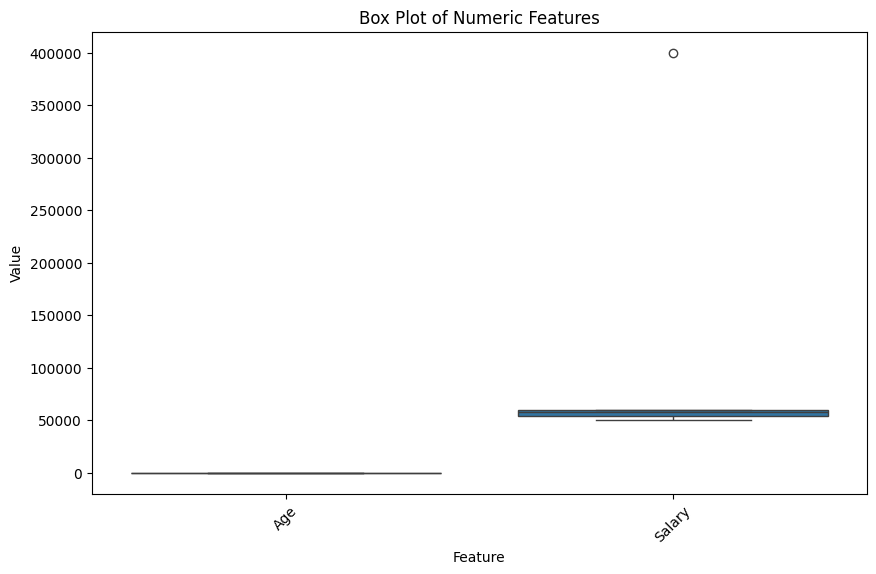

In [ ]:
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number'])
melted_df = numeric_cols.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.title('Box Plot of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

## Calculate Q1 and Q3

In [1]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

NameError: name 'df' is not defined

In [ ]:
# identify outlier
outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]
outliers

## Capping outliers

In [ ]:
upper_bound

np.float64(69000.0)

In [ ]:
lower_bound

np.float64(45000.0)

In [ ]:
df['Salary'] = df['Salary'].apply(lambda x: min(max(x, lower_bound), upper_bound))
df

Name    Age  Gender   Salary Purchased
0   John  25.00    Male  50000.0       Yes
1  Sarah  28.00  Female  69000.0       Yes
2   Mike  26.25    Male  60000.0       Yes
3   Anna  22.00  Female  58000.0        No
4    Tom  30.00    Male  54000.0       Yes

## work on other way to oulie ers ????

# Data Transformation

### Normalization (Min Max scaling)
### Standardization
### Log Transformation


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Salary1'] = scaler.fit_transform(df[['Salary']])
df

Name    Age  Gender   Salary Purchased   Salary1
0   John  25.00    Male  50000.0       Yes  0.000000
1  Sarah  28.00  Female  69000.0       Yes  1.000000
2   Mike  26.25    Male  60000.0       Yes  0.526316
3   Anna  22.00  Female  58000.0        No  0.421053
4    Tom  30.00    Male  54000.0       Yes  0.210526

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Salary2'] = scaler.fit_transform(df[['Salary']])
df

Name    Age  Gender   Salary Purchased   Salary1  Salary2
0   John  25.00    Male  50000.0       Yes  0.000000 -1.28125
1  Sarah  28.00  Female  69000.0       Yes  1.000000  1.68750
2   Mike  26.25    Male  60000.0       Yes  0.526316  0.28125
3   Anna  22.00  Female  58000.0        No  0.421053 -0.03125
4    Tom  30.00    Male  54000.0       Yes  0.210526 -0.65625

In [ ]:
df['Salary3'] = np.log1p(df['Salary'])
df


Name    Age  Gender   Salary Purchased   Salary1  Salary2    Salary3
0   John  25.00    Male  50000.0       Yes  0.000000 -1.28125  10.819798
1  Sarah  28.00  Female  69000.0       Yes  1.000000  1.68750  11.141876
2   Mike  26.25    Male  60000.0       Yes  0.526316  0.28125  11.002117
3   Anna  22.00  Female  58000.0        No  0.421053 -0.03125  10.968216
4    Tom  30.00    Male  54000.0       Yes  0.210526 -0.65625  10.896758

## Handling Categorical data
### - one hot encoding (nominal)
### - Label Encoding (Ordinal)



In [ ]:
data = pd.get_dummies(df, columns=['Gender', 'Purchased'])
data

Name    Age   Salary   Salary1  Salary2    Salary3  Gender_Female  \
0   John  25.00  50000.0  0.000000 -1.28125  10.819798          False   
1  Sarah  28.00  69000.0  1.000000  1.68750  11.141876           True   
2   Mike  26.25  60000.0  0.526316  0.28125  11.002117          False   
3   Anna  22.00  58000.0  0.421053 -0.03125  10.968216           True   
4    Tom  30.00  54000.0  0.210526 -0.65625  10.896758          False   

   Gender_Male  Purchased_No  Purchased_Yes  
0         True         False           True  
1        False         False           True  
2         True         False           True  
3        False          True          False  
4         True         False           True

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Gender', 'Purchased']]) # fit and transform
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Gender','Purchased']))

encoded_df


Gender_Female  Gender_Male  Purchased_No  Purchased_Yes
0            0.0          1.0           0.0            1.0
1            1.0          0.0           0.0            1.0
2            0.0          1.0           0.0            1.0
3            1.0          0.0           1.0            0.0
4            0.0          1.0           0.0            1.0

In [ ]:
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded


Name    Age  Gender   Salary Purchased   Salary1  Salary2    Salary3  \
0   John  25.00    Male  50000.0       Yes  0.000000 -1.28125  10.819798   
1  Sarah  28.00  Female  69000.0       Yes  1.000000  1.68750  11.141876   
2   Mike  26.25    Male  60000.0       Yes  0.526316  0.28125  11.002117   
3   Anna  22.00  Female  58000.0        No  0.421053 -0.03125  10.968216   
4    Tom  30.00    Male  54000.0       Yes  0.210526 -0.65625  10.896758   

   Gender_Female  Gender_Male  Purchased_No  Purchased_Yes  
0            0.0          1.0           0.0            1.0  
1            1.0          0.0           0.0            1.0  
2            0.0          1.0           0.0            1.0  
3            1.0          0.0           1.0            0.0  
4            0.0          1.0           0.0            1.0

In [ ]:
df_encoded.drop(['Name', 'Gender', 'Purchased', 'Salary1', 'Salary2', 'Salary3'], axis=1, inplace=True)
df_encoded

Age   Salary  Gender_Female  Gender_Male  Purchased_No  Purchased_Yes
0  25.00  50000.0            0.0          1.0           0.0            1.0
1  28.00  69000.0            1.0          0.0           0.0            1.0
2  26.25  60000.0            0.0          1.0           0.0            1.0
3  22.00  58000.0            1.0          0.0           1.0            0.0
4  30.00  54000.0            0.0          1.0           0.0            1.0

## Binning
Binning is used to convert continuius data into discrete categories

# Feature Engineering
Generating new feature

Feature Transformation

Feature Selection

Dimensionality reduction

In [ ]:
corrl = df_encoded.corr()
corrl

Age    Salary  Gender_Female  Gender_Male  Purchased_No  \
Age            1.000000  0.164256      -0.376462     0.376462     -0.783818   
Salary         0.164256  1.000000       0.676161    -0.676161     -0.015625   
Gender_Female -0.376462  0.676161       1.000000    -1.000000      0.612372   
Gender_Male    0.376462 -0.676161      -1.000000     1.000000     -0.612372   
Purchased_No  -0.783818 -0.015625       0.612372    -0.612372      1.000000   
Purchased_Yes  0.783818  0.015625      -0.612372     0.612372     -1.000000   

               Purchased_Yes  
Age                 0.783818  
Salary              0.015625  
Gender_Female      -0.612372  
Gender_Male         0.612372  
Purchased_No       -1.000000  
Purchased_Yes       1.000000

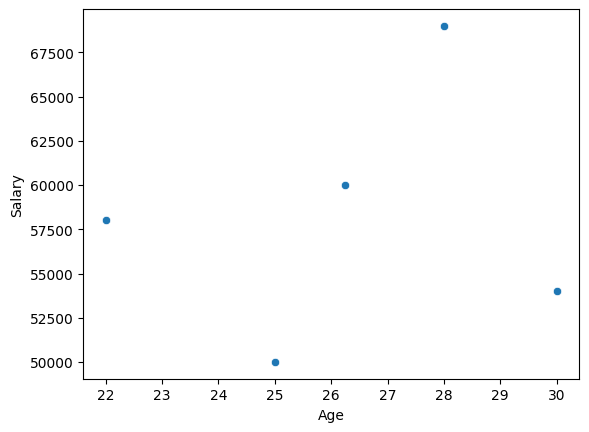

In [ ]:
sns.scatterplot(data=df_encoded, x='Age', y='Salary')
plt.show()

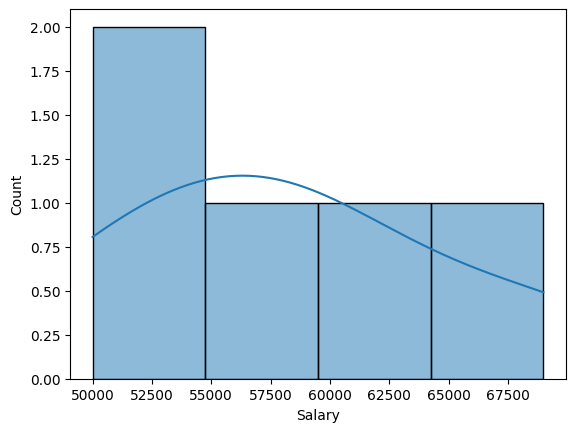

In [ ]:
sns.histplot(data=df_encoded['Salary'], kde=True)
plt.show()

# Inro To ML
## 1) Supervised Learning

In [ ]:
# Tip Dataset
# Can we predict the amount of tip based on total bill, gender, smoker/non-smoker, status, day and time

df = sns.load_dataset("tips")
df.head(10)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2

In [ ]:
df.describe()

total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

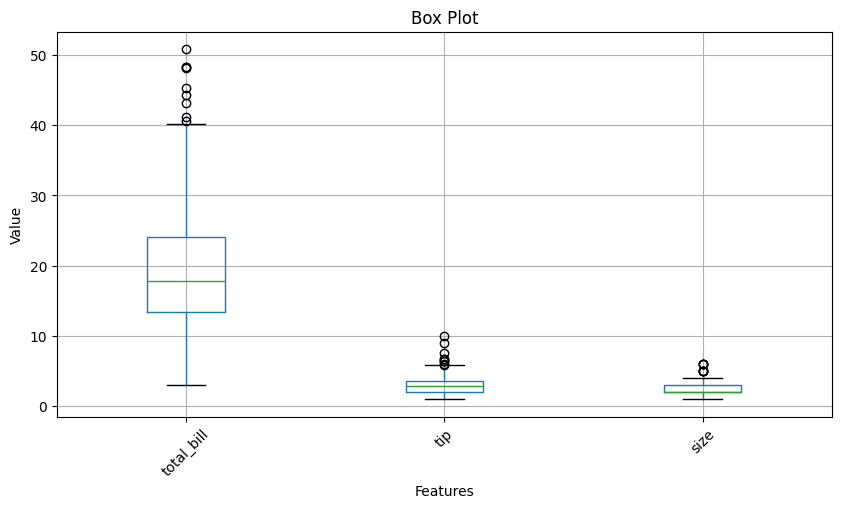

In [ ]:
df.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

# identify outlier
outliers = df[(df['total_bill'] < lower_bound) | (df['total_bill'] > upper_bound)]
outliers

-2.8224999999999945
40.29749999999999


total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4

In [ ]:
df['total_bill'] = df['total_bill'].apply(lambda x: min(max(x, lower_bound), upper_bound))
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

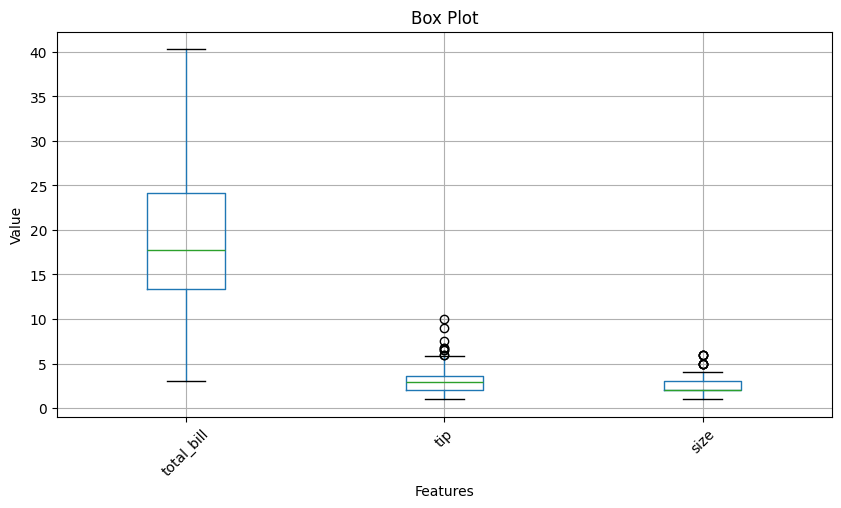

In [ ]:
df.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[['sex', 'smoker', 'day', 'time']]) # fit and transform
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['sex', 'smoker', 'day', 'time']))

encoded_df

sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  time_Lunch
0         0.0         0.0      0.0      1.0       0.0         0.0
1         1.0         0.0      0.0      1.0       0.0         0.0
2         1.0         0.0      0.0      1.0       0.0         0.0
3         1.0         0.0      0.0      1.0       0.0         0.0
4         0.0         0.0      0.0      1.0       0.0         0.0
..        ...         ...      ...      ...       ...         ...
239       1.0         0.0      1.0      0.0       0.0         0.0
240       0.0         1.0      1.0      0.0       0.0         0.0
241       1.0         1.0      1.0      0.0       0.0         0.0
242       1.0         0.0      1.0      0.0       0.0         0.0
243       0.0         0.0      0.0      0.0       1.0         0.0

[244 rows x 6 columns]

In [ ]:
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded = df_encoded.drop(['sex', 'smoker', 'day', 'time'], axis=1)
df_encoded

total_bill   tip  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0         16.99  1.01     2       0.0         0.0      0.0      1.0       0.0   
1         10.34  1.66     3       1.0         0.0      0.0      1.0       0.0   
2         21.01  3.50     3       1.0         0.0      0.0      1.0       0.0   
3         23.68  3.31     2       1.0         0.0      0.0      1.0       0.0   
4         24.59  3.61     4       0.0         0.0      0.0      1.0       0.0   
..          ...   ...   ...       ...         ...      ...      ...       ...   
239       29.03  5.92     3       1.0         0.0      1.0      0.0       0.0   
240       27.18  2.00     2       0.0         1.0      1.0      0.0       0.0   
241       22.67  2.00     2       1.0         1.0      1.0      0.0       0.0   
242       17.82  1.75     2       1.0         0.0      1.0      0.0       0.0   
243       18.78  3.00     2       0.0         0.0      0.0      0.0       1.0   

     time_Lunch  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
239         0.0  
240         0.0  
241         0.0  
242         0.0  
243         0.0  

[244 rows x 9 columns]

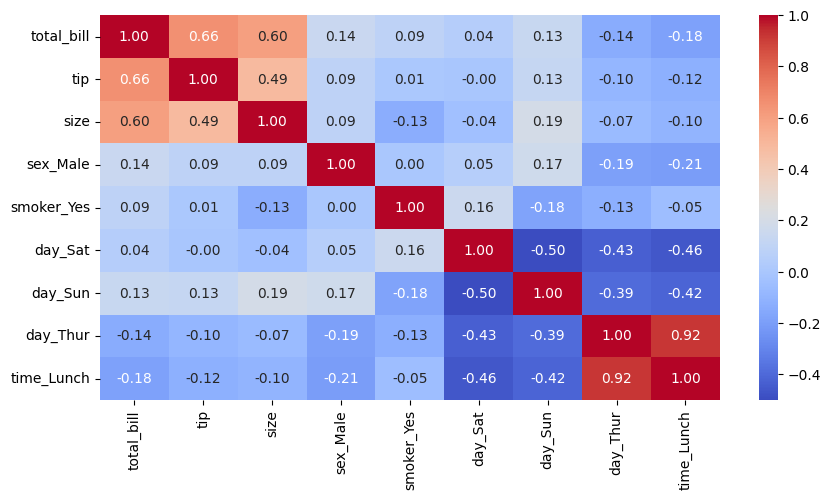

In [ ]:
#EDA
plt.figure(figsize=(10,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


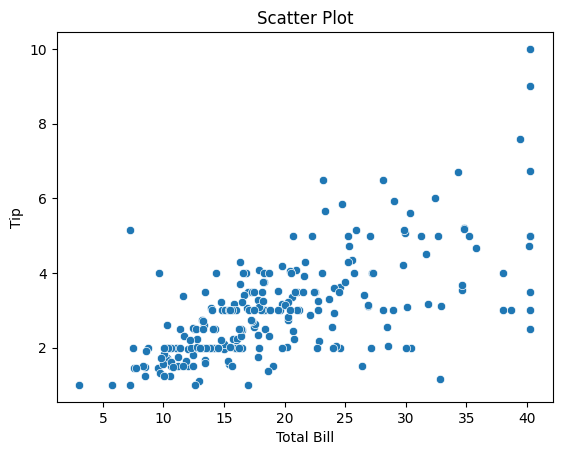

In [ ]:
# Scatterplot b/w toatl_bill and tip
sns.scatterplot(data=df_encoded, x='total_bill', y='tip')
plt.title('Scatter Plot')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
# define the features and target variables
from sklearn.model_selection import train_test_split

x = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# train the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#make prediction
y_pred = model.predict(x_test)
y_pred

array([2.94471356, 1.99828081, 3.99414344, 3.84157668, 2.14222884,
       2.6785034 , 3.64376763, 2.27460901, 2.56615786, 2.45253057,
       2.89781317, 2.08959089, 2.1016947 , 2.35629695, 1.79447574,
       3.10907489, 2.97680816, 3.20868097, 2.5836533 , 5.70292817,
       3.4891164 , 3.2755547 , 2.1999332 , 1.97431468, 3.17269652,
       2.24259631, 2.14001385, 3.23647416, 3.23256457, 5.98693518,
       5.01921505, 1.62177585, 3.25962233, 2.80760895, 2.98287025,
       3.8755089 , 2.17862682, 5.22636499, 2.33886132, 3.03249204,
       2.06502383, 2.46736595, 3.43261918, 2.35546533, 1.93352228,
       0.88546476, 1.84843526, 3.09035686, 1.85235801])

In [ ]:
# valuate modal
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared:{r2:.2f}")

Mean Squared Error:0.67
R-squared:0.47


In [ ]:
# mean is not close to 1 so we need to do feature engineering
df['tip_percentage'] = df['tip'] / df['total_bill']
df

total_bill   tip     sex smoker   day    time  size  tip_percentage
0         16.99  1.01  Female     No   Sun  Dinner     2        0.059447
1         10.34  1.66    Male     No   Sun  Dinner     3        0.160542
2         21.01  3.50    Male     No   Sun  Dinner     3        0.166587
3         23.68  3.31    Male     No   Sun  Dinner     2        0.139780
4         24.59  3.61  Female     No   Sun  Dinner     4        0.146808
..          ...   ...     ...    ...   ...     ...   ...             ...
239       29.03  5.92    Male     No   Sat  Dinner     3        0.203927
240       27.18  2.00  Female    Yes   Sat  Dinner     2        0.073584
241       22.67  2.00    Male    Yes   Sat  Dinner     2        0.088222
242       17.82  1.75    Male     No   Sat  Dinner     2        0.098204
243       18.78  3.00  Female     No  Thur  Dinner     2        0.159744

[244 rows x 8 columns]

In [ ]:
# categorical feature
cat_feature = ['day', 'time']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[cat_feature])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_feature))
encoded_df

day_Sat  day_Sun  day_Thur  time_Lunch
0        0.0      1.0       0.0         0.0
1        0.0      1.0       0.0         0.0
2        0.0      1.0       0.0         0.0
3        0.0      1.0       0.0         0.0
4        0.0      1.0       0.0         0.0
..       ...      ...       ...         ...
239      1.0      0.0       0.0         0.0
240      1.0      0.0       0.0         0.0
241      1.0      0.0       0.0         0.0
242      1.0      0.0       0.0         0.0
243      0.0      0.0       1.0         0.0

[244 rows x 4 columns]

In [ ]:
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded = df_encoded.drop(cat_feature, axis=1)
df_encoded = df_encoded.drop(['sex','smoker'], axis=1)
df_encoded

total_bill   tip  size  tip_percentage  day_Sat  day_Sun  day_Thur  \
0         16.99  1.01     2        0.059447      0.0      1.0       0.0   
1         10.34  1.66     3        0.160542      0.0      1.0       0.0   
2         21.01  3.50     3        0.166587      0.0      1.0       0.0   
3         23.68  3.31     2        0.139780      0.0      1.0       0.0   
4         24.59  3.61     4        0.146808      0.0      1.0       0.0   
..          ...   ...   ...             ...      ...      ...       ...   
239       29.03  5.92     3        0.203927      1.0      0.0       0.0   
240       27.18  2.00     2        0.073584      1.0      0.0       0.0   
241       22.67  2.00     2        0.088222      1.0      0.0       0.0   
242       17.82  1.75     2        0.098204      1.0      0.0       0.0   
243       18.78  3.00     2        0.159744      0.0      0.0       1.0   

     time_Lunch  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
239         0.0  
240         0.0  
241         0.0  
242         0.0  
243         0.0  

[244 rows x 8 columns]

In [ ]:
x = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred

# valuate modal

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared:{r2:.2f}")

Mean Squared Error:0.19
R-squared:0.85


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = sns.load_dataset("iris")
df.head(10)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

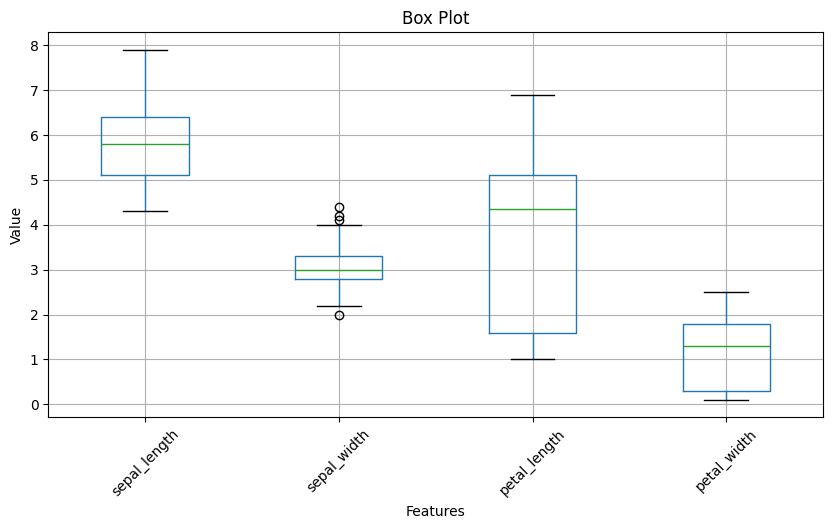

In [ ]:

df.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

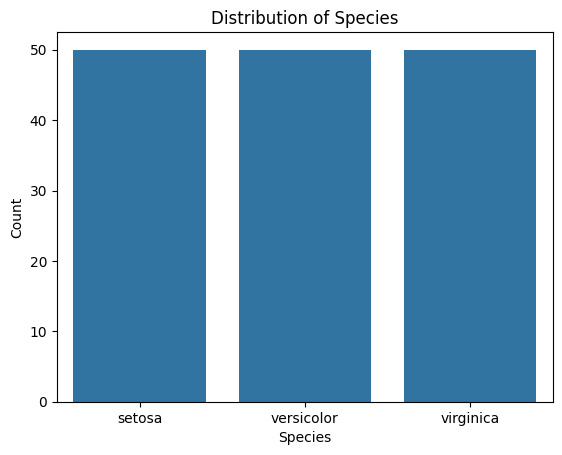

In [ ]:
# distribution of target data
sns.countplot(x='species', data=df)
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [ ]:
x = df.drop('species', axis=1)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)
y_pred

# valuate modal
accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score:{accuracy_score:.2f}")

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Accuracy Score:0.93
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print(f"Cross Validation Scores:{cv_scores}")
print(f"Mean Cross Validation Score:{cv_scores.mean():.2f}")

Cross Validation Scores:[0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean Cross Validation Score:0.95


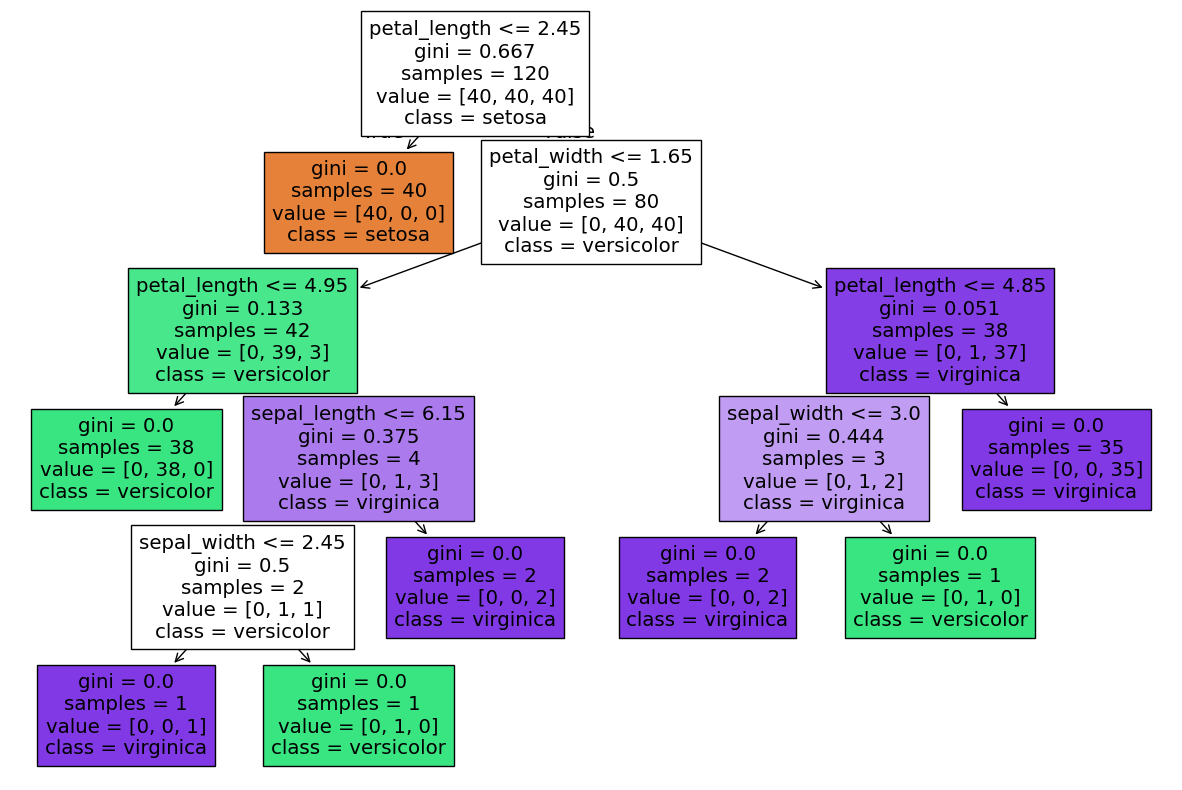

In [ ]:
# visulaize decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=model.classes_)
plt.show()

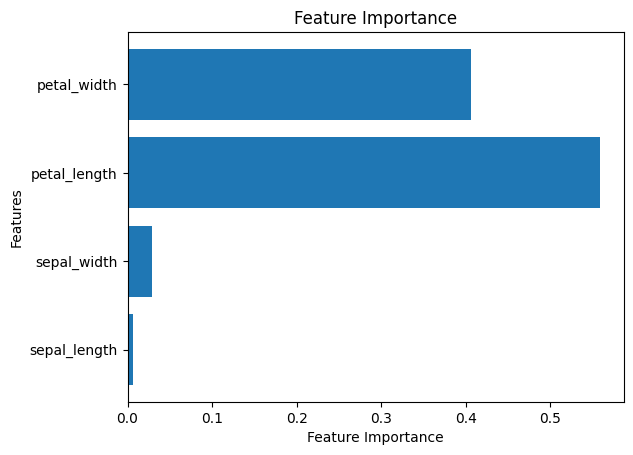

In [ ]:
# Feature impportance
feature_importance = model.feature_importances_
feature_importance
feature = x.columns
plt.barh(feature, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## Pruning
## Hyperparamter tuning
(help to find



In [ ]:
# Hyperparameter tuing usng grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3,5,7,None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best Score:{grid_search.best_score_:.2f}")

Best Parameters:{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:0.94


## Support Vector Machines

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=300, noise=0.2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

kernals = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernals:
  #model = SVC(kernel=kernel)
  model = SVC(kernel=kernel, C=1, gamma='scale')   # c is a regulalarization paramiter , gamma influence the invidual sample
  model.fit(x_train, y_train)
  score = model.score(x_test, y_test)
  print(f"Accuracy with {kernel} kernel: {score:.3f}")


Accuracy with linear kernel: 0.900
Accuracy with poly kernel: 0.867
Accuracy with rbf kernel: 0.983
Accuracy with sigmoid kernel: 0.733


try standard scaling, min max ,

## SVN

In [ ]:
# svn classifies
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

wine = datasets.load_wine()
winedf = pd.DataFrame(data=wine.data, columns=wine.feature_names)
winedf['target'] = wine.target
winedf.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0  
5                          2.85   1450.0       0  
6                          3.58   1290.0       0  
7                          3.58   1295.0       0  
8                          2.85   1045.0       0  
9                          3.55   1045.0       0

In [ ]:
winedf.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

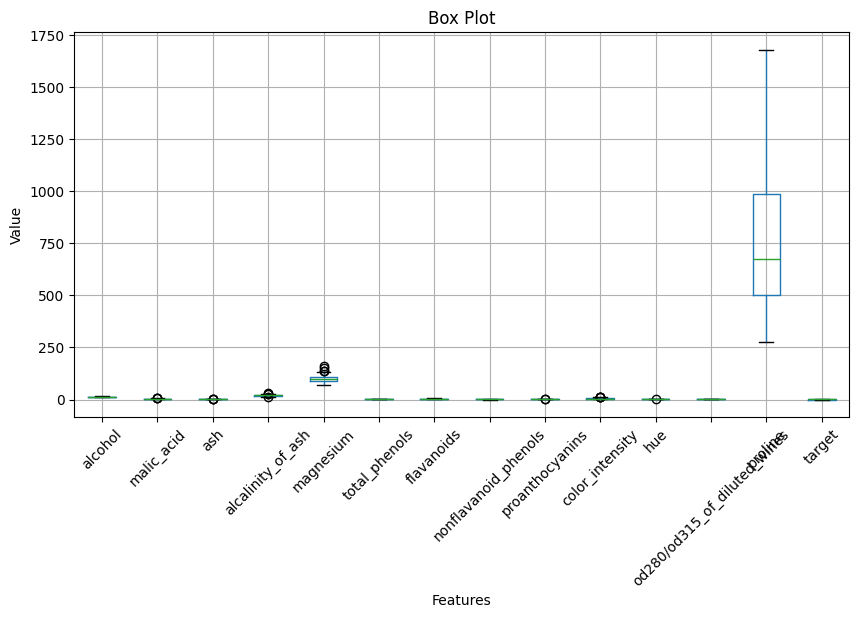

In [ ]:
winedf.boxplot(figsize=(10,5))
plt.title('Box Plot')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

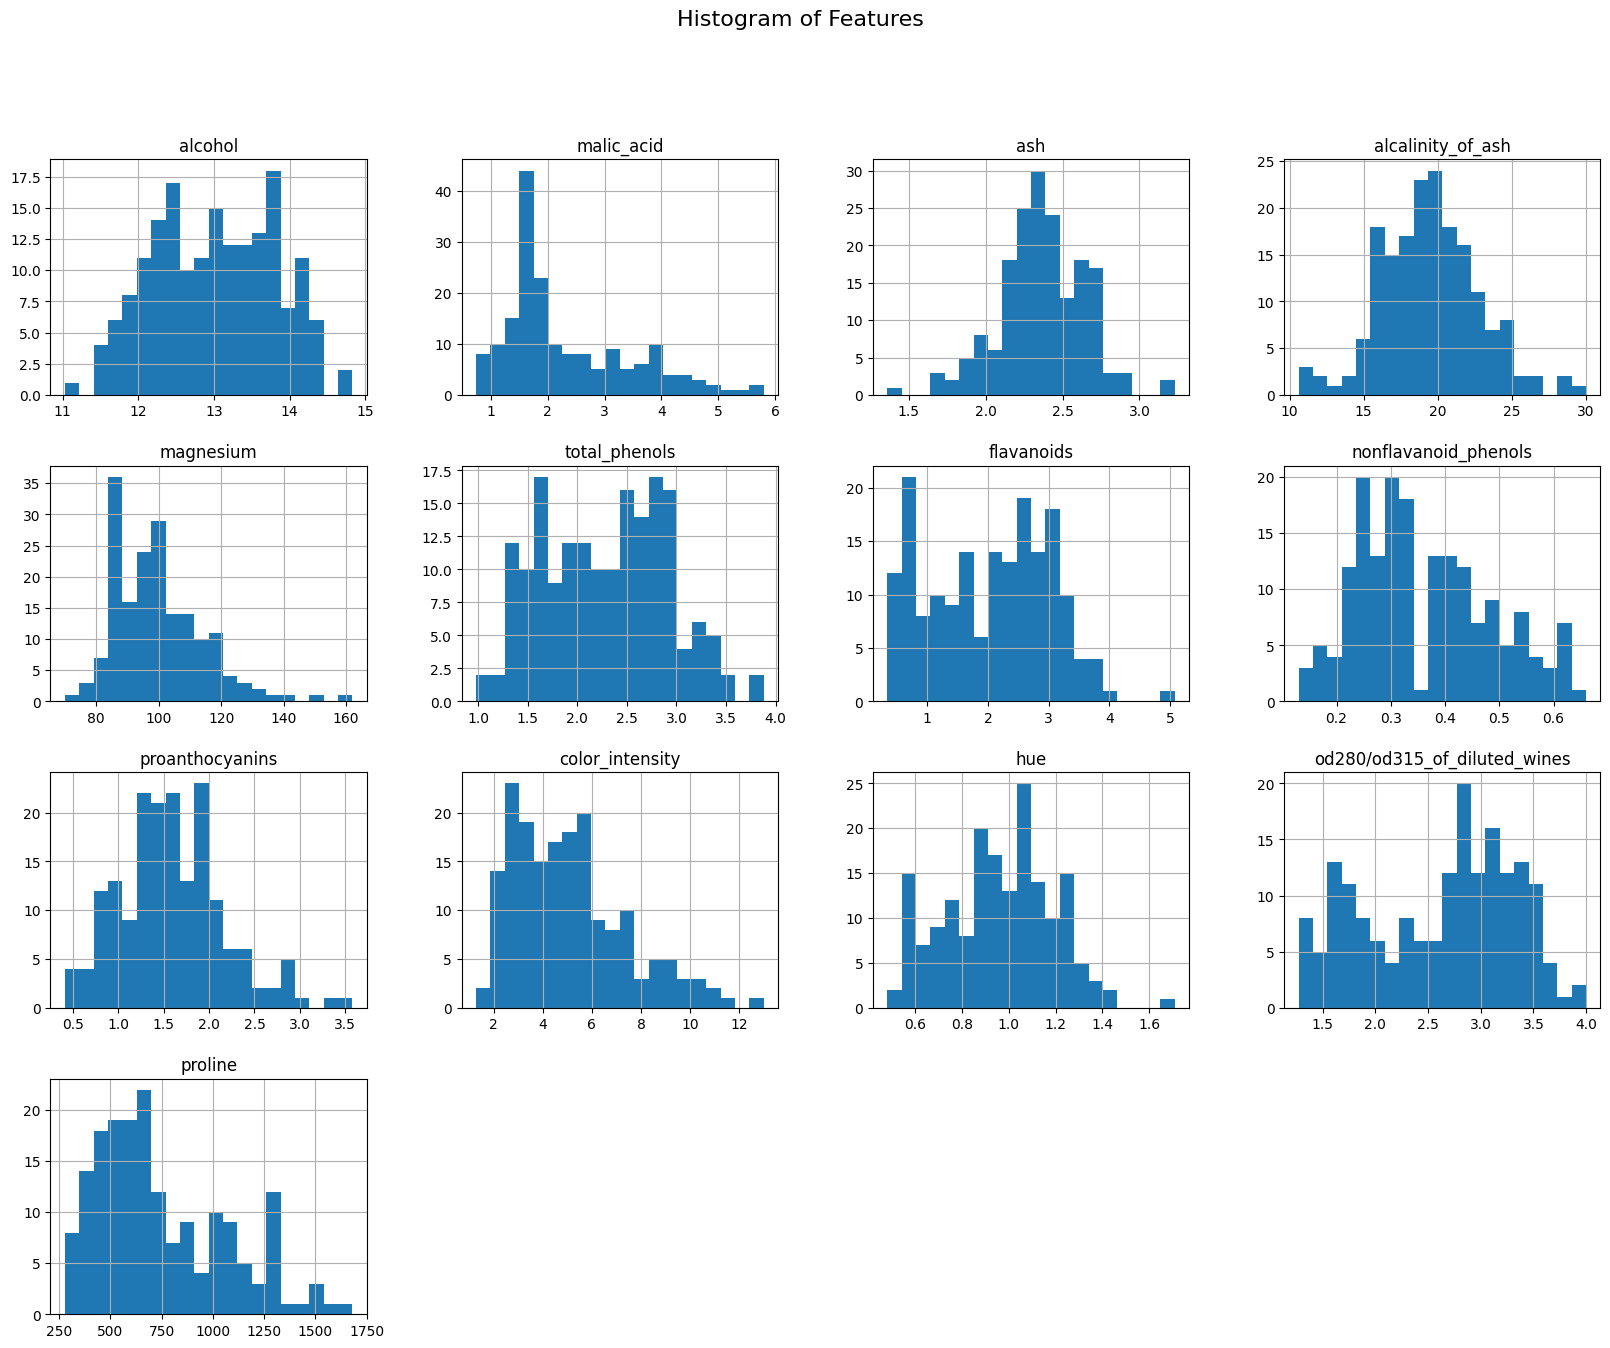

In [ ]:

winedf.drop('target', axis=1).hist(bins=20, figsize=(20,15))
plt.suptitle('Histogram of Features', fontsize=16)
plt.show()

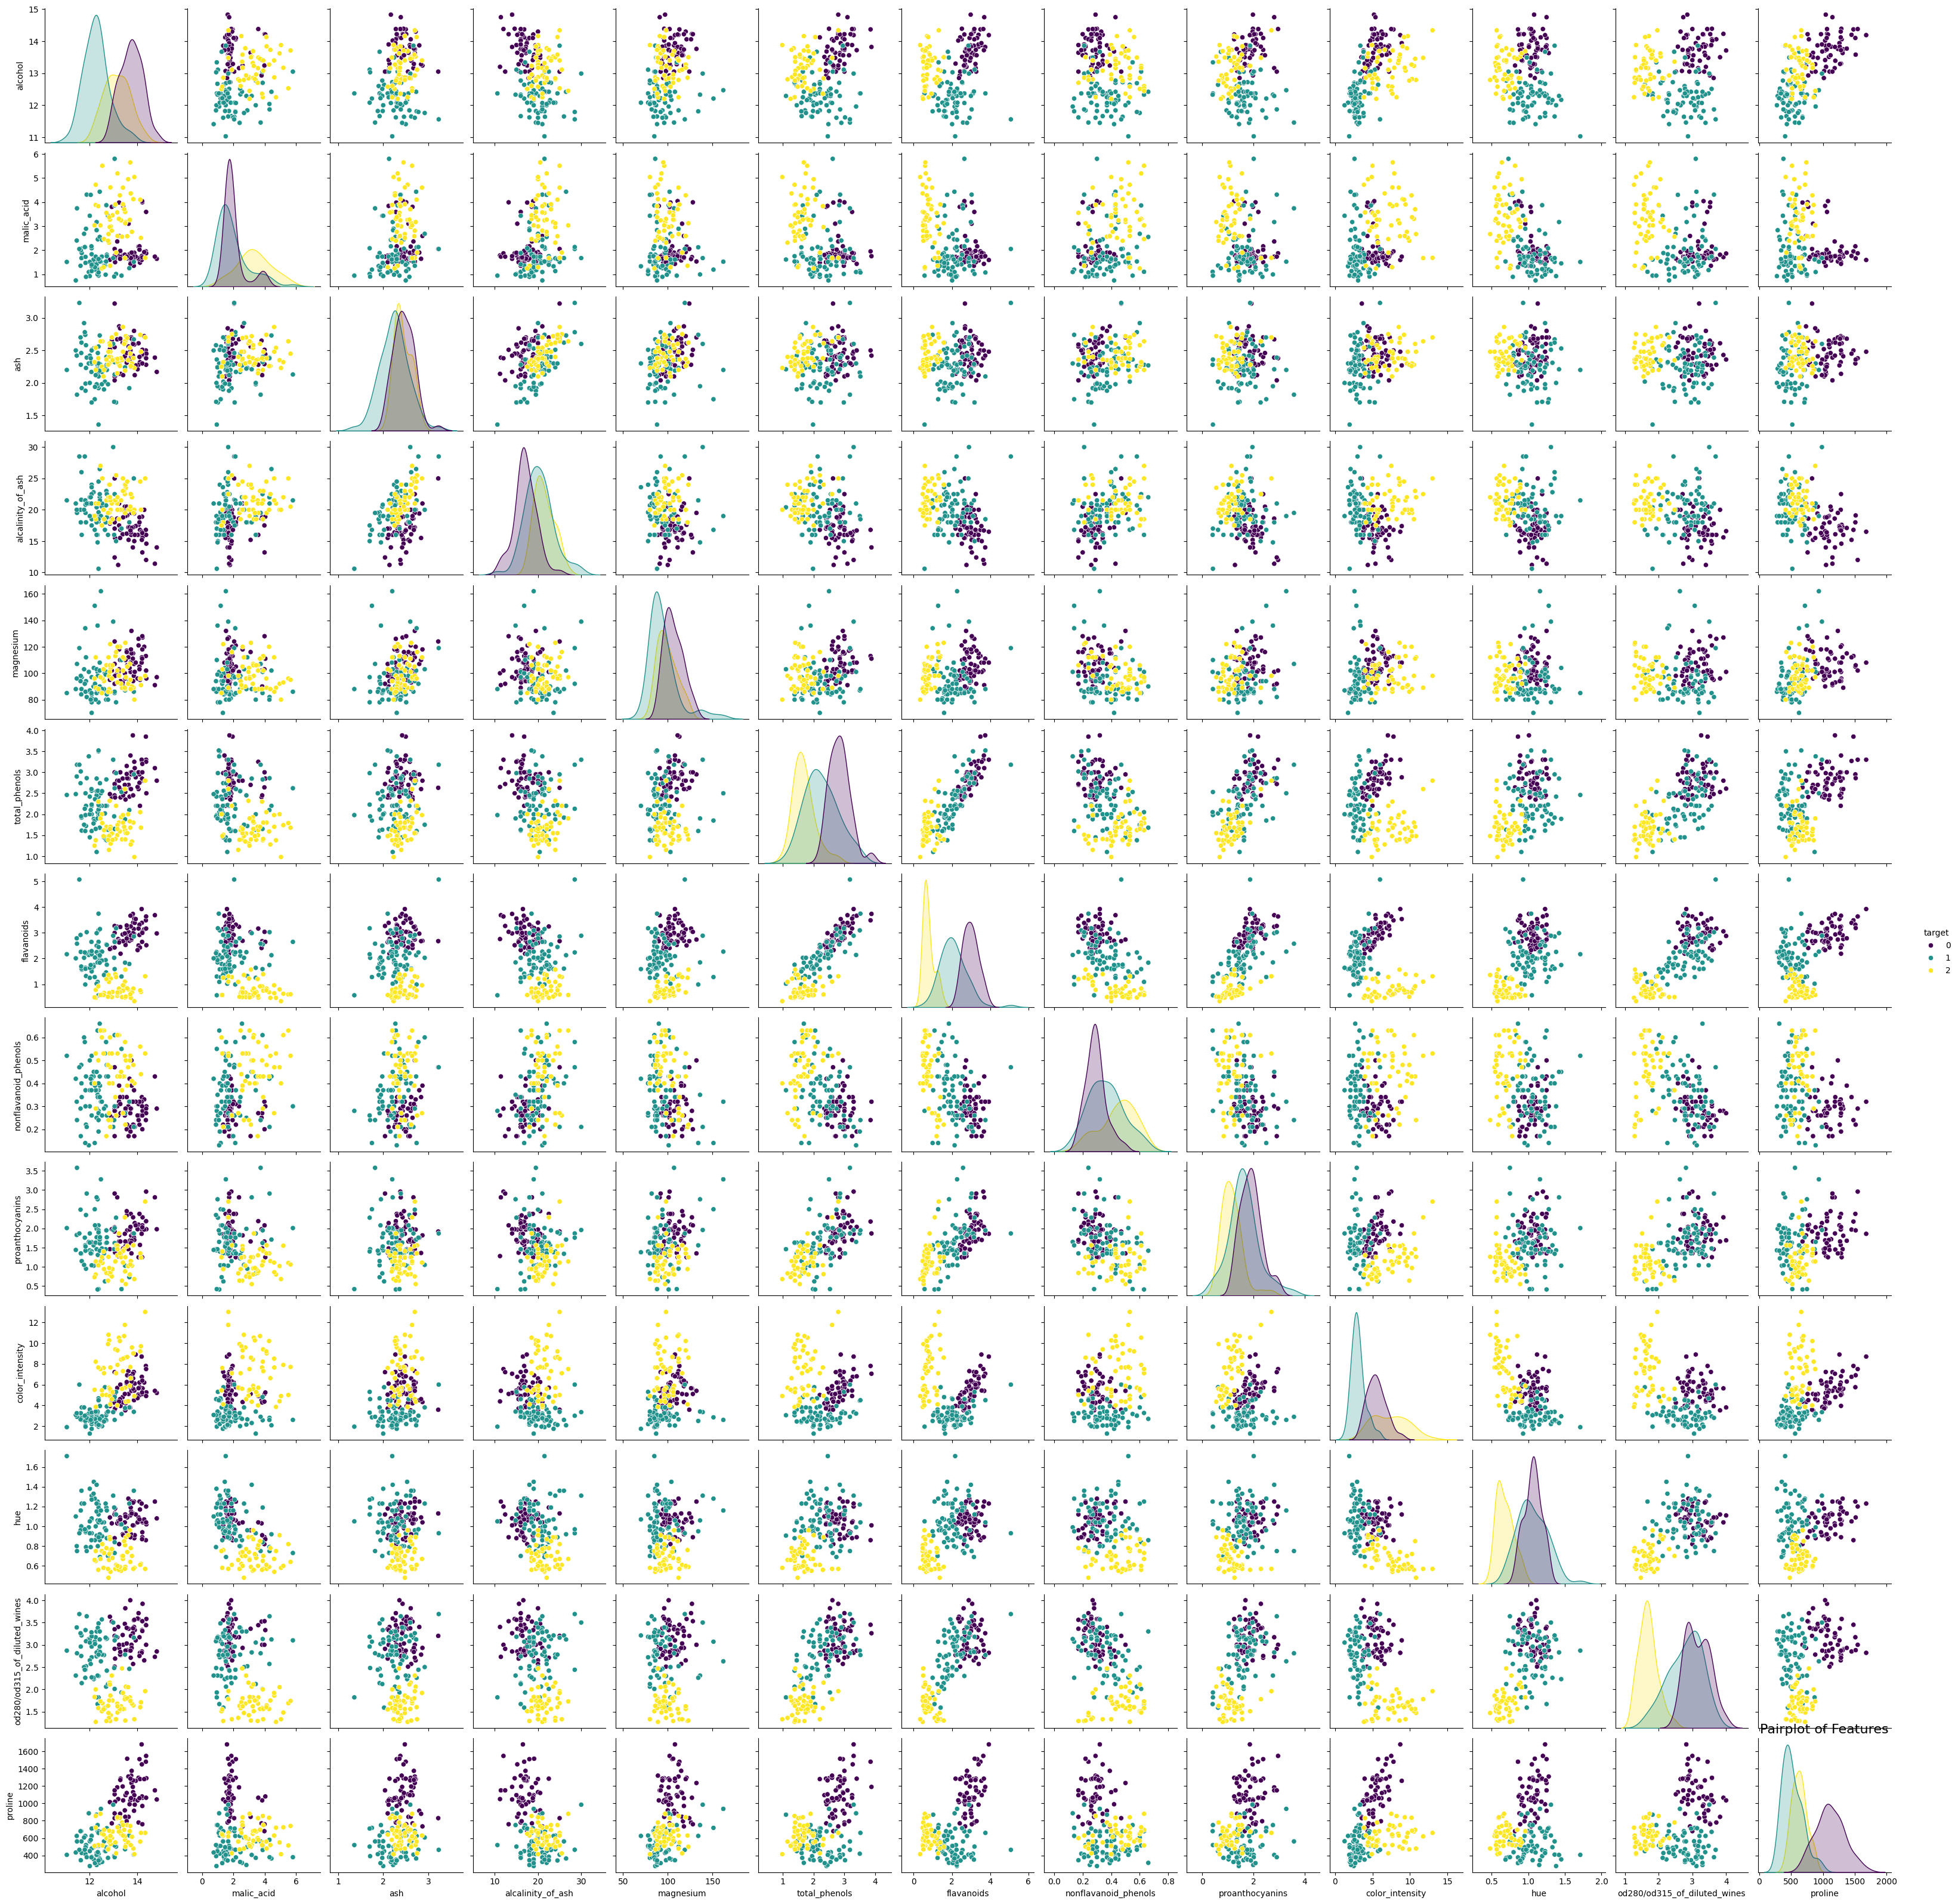

In [ ]:
sns.pairplot(winedf, hue='target', palette='viridis', height=2.5)
plt.title('Pairplot of Features', fontsize=16)
plt.show()

In [ ]:
x = winedf.drop('target', axis=1)
y = winedf['target']


In [ ]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

print(len(x_train))
print(len(x_test))
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)




36
142


In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)


print(f"Accuracy Score:{accuracy_score(y_test, y_pred):.2f}")

classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Accuracy Score:0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.92      0.96      0.94        57
           2       0.97      0.95      0.96        40

    accuracy                           0.95       142
   macro avg       0.96      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142



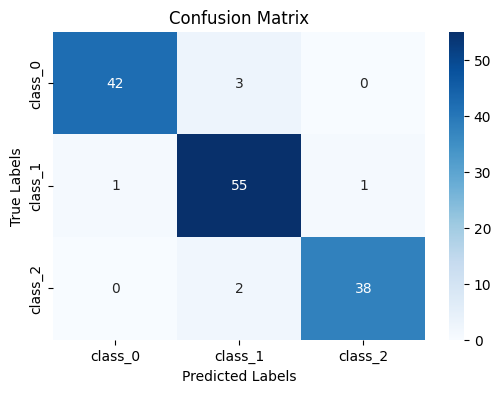

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
svm_model.fit(x_train, y_train)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best Parameters:{grid_search.best_params_}")
print(f"Best Score:{grid_search.best_score_:.2f}")

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(x_test)
print(y_test)
print(  y_pred)

print(f"Accuracy Score:{accuracy_score(y_test, y_pred):.2f}")

Best Parameters:{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score:1.00
158    2
137    2
98     1
159    2
38     0
      ..
71     1
106    1
14     0
92     1
102    1
Name: target, Length: 142, dtype: int64
[2 2 1 2 1 1 1 1 2 0 1 2 2 0 1 0 0 2 2 1 1 0 1 0 2 1 1 2 0 0 0 2 0 0 1 2 1
 0 2 0 0 2 1 1 0 2 0 0 1 0 0 2 1 1 1 0 1 1 1 2 2 0 1 2 2 1 0 0 1 2 2 1 2 1
 1 1 0 0 2 0 2 0 0 1 1 0 0 0 1 0 2 2 1 1 2 2 2 1 0 0 1 2 2 0 1 2 1 2 2 1 0
 1 0 2 0 0 1 0 0 2 1 0 2 2 0 0 2 2 2 1 1 1 1 1 1 2 0 0 1 0 1 1]
Accuracy Score:0.94
